# Battle of Dazar'alor Guild Awards Analysis

<ul>
<li><a href="#collect">Collect Analysis Data</a></li>
<li><a href="#champion">Champion of the Light</a></li>
<li><a href="#jadefire">Jadefire Masters</a>
    <ul>
        <li><a href="#jf_interrupts">Interrupts</a></li>
        <li><a href="#multi-sided">Multi-Sided Strike</a></li>
        <li><a href="#jf_dispells">Dispells</a></li>
    </ul></li>
<li><a href="#vectis">Vectis</a>
    <ul>
        <li><a href="#soaks">Plague Bomb (Soaks)</a></li>
        <li><a href="#v-stack">Lingering Infection (Debuff Stacks)</a></li>
    </ul></li>
<li><a href="#fetid">Fetid</a>
    <ul>
        <li><a href="#f-stacks">Debuff Damage</a></li>
        <li><a href="#add-dam">Add Damage</a></li>
    </ul></li>
<li><a href="#zul">Zul</a>
<li><a href="#mythrax">Mythrax</a>
    <ul>
        <li><a href="#beam">Obliteration Blast (Beam)</a></li>
        <li><a href="#m-stacks">Annihilation (Debuff Stacks)</a></li>
    </ul></li>
<li><a href="#ghuun">G'Huun</a>
    <ul>
        <li><a href="#fear">Gaze of G'huun (Fears)</a></li>
        <li><a href="#orb">Virulent Corruption (Orb)</a></li>
        <li><a href="#growth">Malignant Growth</a></li>
        <li><a href="#dunk">Power Matrix Dunk</a></li>
        <li><a href="#stuns">Interrupts/Stuns</a></li>
    </ul></li>
<li><a href="#overall">Overall</a>
    <ul>
        <li><a href="#pots">Most Pots Used</a></li>
        <li><a href="#healthstone">Most Healthstones/Pots Used</a></li>
        <li><a href="#rankings">Rankings</a></li>
        <li><a href="#prog-parse">Highest Parse on Progression Kill</a></li>
        <li><a href="#least-damage">Least Damage on Progression Kills</a></li>
        <li><a href="#attendance">Attendance</a></li>
        <li><a href="#kills">Boss Kills</a></li>
    </ul></li>
</ul>

This notebook extracts information from the [Warcraft Logs](https://www.warcraftlogs.com/) API to produce data for the [Tempest](https://tempest-proudmoore.enjin.com/) Battle of Dazar'alor guild awards.

## Setup

In [3]:
# Import all required libraries and modules
import os
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warcraft_logs_fn as wl
import log_analysis as la
import api_key

In [4]:
# Import key
api_key = api_key.key

In [8]:
guild_info = wl.GUILD_INFO

# Confirm start dates for Uldir logs
fights = requests.get("https://www.warcraftlogs.com:443/v1/reports/guild/Tempest/Proudmoore/US?api_key=" + api_key)
requests_df = pd.DataFrame(fights.json())
requests_df.head()

,end,id,owner,start,title,zone
0,1558060186526,2rNJzn4Q1pZm96gt,Shadowbaine,1558058549530,MYTHIC ONE SHOT JAINA,21
1,1557982609841,pdgTJPmYfahQbB19,Shadowbaine,1557972721947,Mythic Jaina,21
2,1557895985984,fn4xtBKFvL3CR1wQ,Shadowbaine,1557885809438,Mythic Jaina,21
3,1557464164692,3Rm1jktVXyM8JYpD,slimey42,1557459376451,Battle of Dazar'alor,21
4,1557459208310,qmXPL4wD27kH86GC,slimey42,1557459208310,Mythic Jaina,-1


In [12]:
has_title = requests_df['title'].str.contains('Dazar\'alor', regex=False)
requests_df.iloc[requests_df[has_title]['start'].idxmin]

end          1548222958965
id        QDv6xHAJXzFy43mK
owner          Shadowbaine
start        1548215115013
title    Heroic Dazar'alor
zone                    21
Name: 82, dtype: object

The first log starts at 1548215115013.

In [32]:
# Get player info
player_list = pd.read_csv('player_list.csv', encoding='iso-8859-1')
player_list

,player,primary_role,alt,tier_end,tier_start,start_date
0,Irvaeryss,mdps,NaN,True,True,NaN
1,Metönymy,rdps,NaN,True,True,NaN
2,Brianjr,mdps,NaN,True,True,NaN
3,Petroll,rdps,NaN,True,True,NaN
4,Ayriea,rdps,NaN,True,True,NaN
5,Stradivarus,rdps,NaN,True,False,NaN
6,Earrl,tank,NaN,True,True,NaN
7,Illestrae,healer,NaN,True,True,NaN
8,Elzam,mdps,NaN,True,True,NaN
9,Tawn,rdps,NaN,True,True,NaN


In [17]:
# Extract logs
log_info = wl.get_logs(api_key, guild_info, log_start=1548215115013)
wl.save_logs(log_info, api_key, guild_info, log_start=1548215115013)

# Create boss list
boss_list = ['Champion of the Light', 
             'Jadefire Masters', 
             'Grong the Revenant', 
             'Opulence', 
             'Conclave of the Chosen',
             'King Rastakhan', 
             'Mekkatorque', 
             'Stormwall Blockade', 
             'Lady Jaina Proudmoore']

# Extract fight details and save
fight_df = wl.extract_fights(boss_list)
wl.create_master_list(log_info, fight_df)


All files created.

Log ID 2n6mNHytd7KPqxFY done.
Log ID 2rNJzn4Q1pZm96gt done.
Log ID 39f2VGXaFDPdqbpm done.
Log ID 3Rm1jktVXyM8JYpD done.
Log ID 48DMZQgHCAmVnXGY done.
Log ID 4r72XaA6CGbJDHdQ done.
Log ID 4yqhHd78P6JmxVgA done.
Log ID 6D3kj1MH9qdGRWh7 done.
Log ID 6hpXA92w7DyrfGFJ done.
Log ID 6vGW8nAf4Tr3YXc7 done.
Log ID 7bPmh4xrpFV2gATZ done.
Log ID 7NmgfrcMDtARwj1X done.
Log ID 83fmtrcMd1QAGbPX done.
Log ID 8A4bMkm9jrP3BdNp done.
Log ID 9BMrygDJfw71aLdv done.
Log ID Adjv2WVN3RnMJmhT done.
Log ID AmWzPKb2yBLr4TM8 done.
Log ID AXrNYJ197F2dQtGx done.
Log ID b23RxZy4LQCqvFnr done.
Log ID B6qyKdHYhA2WDr9x done.
Log ID b7GvK2hqQ6WcYV1a done.
Log ID bG3vrKFA2pwk8fcT done.
Log ID BMXcpTVq6knrtzQv done.
Log ID CAfkmZBRgWqcGwYy done.
Log ID Cnb8Px6gdNVhKQ3k done.
Log ID cpqZYhf2L4twPDH6 done.
Log ID CQBfWT87GqtR9kcH done.
Log ID dNr7AkmtTnX3Zfzp done.
Log ID DZaAn8V2YfFbgRjv done.
Log ID fdKFDvx2haZX9NQp done.
Log ID fn4xtBKFvL3CR1wQ done.
Log ID fTHwBqRDjYxzk8Vn done.
Log ID FvPtCqfMGYXp

In [18]:
# Check all players added
fight_df.player_name.unique()

array(['Mythroes', 'Hokk', 'Drshad', 'Saltimbanco', 'Tåwn', 'Kardx',
       'Shallowfall', 'Tahvi', 'Draiga', 'Psichopathic', 'Hendrx',
       'Madmoxxie', 'Fürgüs', 'Dirtnaps', 'Kopie', 'Brianjr', 'Brassi',
       'Joshbrolin', 'Kohbee', 'Illestrae', 'Battlepanda', 'Valmet',
       'Soome', 'Ayriea', 'Caydd', 'Atalya', 'Kopyedeep', 'Metönymy',
       'Toyqt', 'Jampers', 'Shadowbaine', 'Petroll', 'Elzam', 'Divinance',
       'Earrl', 'Irvaeryss', 'Velryssa', 'Tawn', 'Ultray', 'Stradivarus',
       'Psychodruid', 'Acturus', 'Ethelbeavers', 'Tahvee', 'Divanance',
       'Stradk', 'Meaculpa', 'Kopye', 'Arkamani', 'Oakinon',
       'Humanraptor', 'Velsummers', 'Basilia', 'Kurrak', 'Piankhi',
       'Shanthina', 'Roflstømpin', 'Ellerancya', 'Rolltheones', 'Äpakuli',
       'Tavee', 'Ghostmalone', 'Kushinaa', 'Lichley', 'Skumple',
       'Postcalzone', 'Magmir', 'Hocc'], dtype=object)

All players are accounted for.

<a id='collect'></a>
## Collect Analysis Data

In [77]:
# Import key and player list
#api_key = api_key.key
player_list = pd.read_csv('player_list.csv', encoding='iso-8859-1')

# Collect guild info
guild_info = wl.GUILD_INFO

log_info = wl.get_logs(api_key, guild_info, log_start=1548215115013)
wl.save_logs(log_info, api_key, guild_info, log_start=1548215115013)

# Create boss list
boss_list = ['Champion of the Light', 
             'Jadefire Masters', 
             'Grong the Revenant', 
             'Opulence', 
             'Conclave of the Chosen',
             'King Rastakhan', 
             'Mekkatorque', 
             'Stormwall Blockade', 
             'Lady Jaina Proudmoore']

# Extract fight details and save
fight_df = wl.extract_fights(boss_list)
wl.create_master_list(log_info, fight_df)

master_list = pd.read_csv('master_list.csv', encoding='iso-8859-1')
master_list = master_list[master_list.difficulty == 5] # Get mythic only


All files created.

Log ID 2n6mNHytd7KPqxFY done.
Log ID 2rNJzn4Q1pZm96gt done.
Log ID 39f2VGXaFDPdqbpm done.
Log ID 3Rm1jktVXyM8JYpD done.
Log ID 48DMZQgHCAmVnXGY done.
Log ID 4r72XaA6CGbJDHdQ done.
Log ID 4yqhHd78P6JmxVgA done.
Log ID 6D3kj1MH9qdGRWh7 done.
Log ID 6hpXA92w7DyrfGFJ done.
Log ID 6vGW8nAf4Tr3YXc7 done.
Log ID 7bPmh4xrpFV2gATZ done.
Log ID 7NmgfrcMDtARwj1X done.
Log ID 83fmtrcMd1QAGbPX done.
Log ID 8A4bMkm9jrP3BdNp done.
Log ID 9BMrygDJfw71aLdv done.
Log ID Adjv2WVN3RnMJmhT done.
Log ID AmWzPKb2yBLr4TM8 done.
Log ID AXrNYJ197F2dQtGx done.
Log ID b23RxZy4LQCqvFnr done.
Log ID B6qyKdHYhA2WDr9x done.
Log ID b7GvK2hqQ6WcYV1a done.
Log ID bG3vrKFA2pwk8fcT done.
Log ID BMXcpTVq6knrtzQv done.
Log ID CAfkmZBRgWqcGwYy done.
Log ID Cnb8Px6gdNVhKQ3k done.
Log ID cpqZYhf2L4twPDH6 done.
Log ID CQBfWT87GqtR9kcH done.
Log ID dNr7AkmtTnX3Zfzp done.
Log ID DZaAn8V2YfFbgRjv done.
Log ID fdKFDvx2haZX9NQp done.
Log ID fn4xtBKFvL3CR1wQ done.
Log ID fTHwBqRDjYxzk8Vn done.
Log ID FvPtCqfMGYXp

C:\Users\rebecca\Git-Hub-Repos\wow-analysis\warcraft_logs_fn.py:196: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  df = pd.concat([df, merged_df])


Log ID RdPGqtm8Jzrb2HTw done.
Log ID rv3DkQPGbxndXWmw done.
Log ID TwM7pNkXLtbfqcYG done.
Log ID vhb4rcfZyYDXWJ1w done.
Log ID WjrATb2Yg6FQxmKh done.
Log ID WN93HbRwqGgv2xyk done.
Log ID Wz1JAwcQyntVkmTb done.
Log ID X43Cz679pFkghawb done.
Log ID XAnR3r9Kt2VzmcBj done.
Log ID XDPn6wRcY1BA4JT2 done.
Log ID xQ6WYrZNRM1FLtmH done.
Log ID Y4zAXFLKxcdHMhgr done.
Log ID yf7rDvctTVZzLHBj done.
Log ID YGNFr2MH37zXD9Th done.
Log ID YMdTDp37JnKLbw1j done.
Log ID YPtpwXbAVNgmGr6L done.

Dataframe created.

Dataframe cleaned.

Master dataframe created.

master_list saved.


In [24]:
# Confirm boss IDs
boss_info = ['boss_id', 'boss_name']
master_list.drop_duplicates(subset=boss_info)[boss_info]

,boss_id,boss_name
224,2281,Lady Jaina Proudmoore
970,2265,Champion of the Light
1010,2266,Jadefire Masters
1050,2263,Grong the Revenant
1090,2271,Opulence
1150,2268,Conclave of the Chosen
1210,2272,King Rastakhan
1290,2276,Mekkatorque
1830,2280,Stormwall Blockade


<a id='champion'></a>
## Champion of the Light

Interrupt Spell IDs:
- Mage: Counterspell (2139), ~~Dragon's Breath (31661)~~
- Druid: Solar Beam (78675), Skull Bash (106839)
- Warrior: Pummel (6552), Intimidating Shout (5246)
- Hunter: Counter Shot (147362), ~~Concussive Shot (5116)~~
- Rogue: Kick (1766), ~~Kidney Shot (408)~~
- DH: Consume Magic (183752)
- Shaman: Wind Shear (57994), Lightning/Cap Totem (192058)
- Paladin: Rebuke (96231), Hammer of Justice (853)
- Monk: Spear Hand Strike (116705), Leg Sweep (119381)
- DK: Mind Freeze (47528)
- Warlock: ~~Spell Lock - pet (19647)~~
- Priest: Silence - Shadow (15487), ~~Holy Word: Chastise (88625)~~

In [138]:
interrupt_ids = [2139, 78675, 106839, 6552, 5246, 147362, 1766, 183752, 
             57994, 192058, 96231, 853, 116705, 119381, 47528, 15487]

In [39]:
champion_interrupts = pd.DataFrame([], columns=['log_id', 'spell_id', 'player', 'count'])

for spell_id in spell_ids:
    try:
        print('Spell Id:', spell_id)
        spell_df = wl.cast_count(api_key, master_list, spell_id, boss_id=2265)
        champion_interrupts = pd.concat([champion_interrupts, spell_df])
    except:
        continue

Spell Id: 2139
Player added: Petroll
Player added: Metönymy
Player added: Metönymy
Player added: Petroll
Player added: Tawn
Player added: Petroll
Player added: Metönymy
Player added: Petroll
Player added: Tawn
Player added: Metönymy
Player added: Metönymy
Player added: Petroll
Player added: Tawn
Player added: Petroll
Player added: Metönymy
Player added: Metönymy
Player added: Petroll
Player added: Petroll
Player added: Tawn
Player added: Metönymy
Player added: Metönymy
Player added: Petroll
Spell Id: 31661
Spell Id: 78675
Player added: Psychodruid
Player added: Soome
Player added: Psychodruid
Player added: Soome
Player added: Psychodruid
Player added: Psychodruid
Player added: Soome
Player added: Psychodruid
Player added: Soome
Player added: Psychodruid
Spell Id: 106839
Player added: Earrl
Player added: Earrl
Player added: Earrl
Player added: Earrl
Player added: Earrl
Spell Id: 6552
Player added: Elzam
Player added: Elzam
Player added: Velryssa
Player added: Elzam
Player added: Elzam
P

Player added: Toyqt
Spell Id: 171140
Spell Id: 116705
Player added: Divinance
Player added: Divinance
Player added: Divinance
Player added: Divinance
Player added: Divinance
Player added: Divinance
Spell Id: 119381
Player added: Divinance
Spell Id: 47528
Player added: Divanance
Player added: Stradk
Player added: Ethelbeavers
Player added: Divanance
Player added: Divanance
Player added: Ethelbeavers
Player added: Ethelbeavers
Player added: Atalya
Spell Id: 19647
Spell Id: 15487
Player added: Stradivarus
Player added: Stradivarus
Player added: Stradivarus
Spell Id: 88625


In [157]:
bins = np.arange(0, 4.5, 0.5)

         player  count  fight_count primary_role  av_count
24         Tawn   19.0            5         rdps  3.800000
5     Divinance   32.0           11         tank  2.909091
2        Ayriea   17.0            7         rdps  2.428571
23       Tahvee   16.0            7         rdps  2.285714
17      Petroll   25.0           11         rdps  2.272727
15     Metönymy   22.0           11         rdps  2.000000
20        Soome   10.0            5         rdps  2.000000
27       Valmet   21.0           11         mdps  1.909091
25        Toyqt   19.0           10         mdps  1.900000
7         Elzam   12.0            7         mdps  1.714286
18  Psychodruid   11.0            7         rdps  1.571429
13       Kohbee    9.0            6         rdps  1.500000
3       Brianjr   14.0           10         mdps  1.400000
11    Irvaeryss    8.0            7         mdps  1.142857
6         Earrl   10.0           11         tank  0.909091
21  Stradivarus    3.0            4         rdps  0.7500

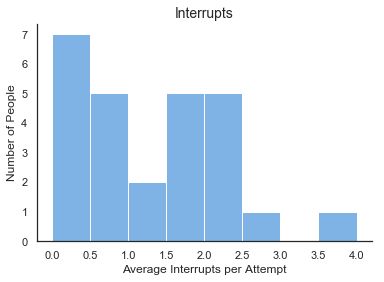

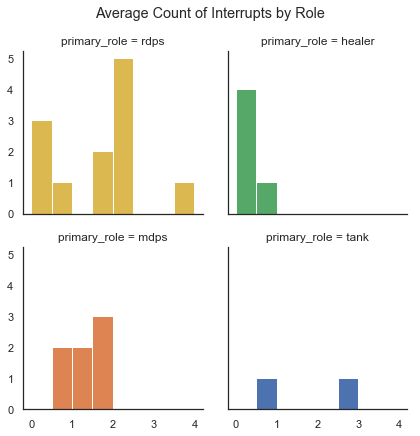

Mean is 1.239042 per attempt.
Median is 1.271429 per attempt.
Max attempts by player is 11.


In [158]:
la.collect_stats(data=champion_interrupts, master_list=master_list, player_list=player_list, 
                 boss_name='Champion of the Light', boss_id=2265, spell_name='Interrupts', 
                 analysis_columns=['count'], min_attempts=1, least=False, bins=bins)

<a id='jadefire'></a>
## Jadefire Masters

<a id='jf_interrupts'></a>
### Interrupts

In [96]:
jadefire_interrupts = pd.DataFrame([], columns=['log_id', 'spell_id', 'player', 'count'])

for spell_id in interrupt_ids:
    try:
        print('Spell Id:', spell_id)
        spell_df = wl.cast_count(api_key, master_list, spell_id, boss_id=2265)
        jadefire_interrupts = pd.concat([jadefire_interrupts, spell_df])
    except:
        continue

Spell Id: 2139
Player added: Petroll
Player added: Metönymy
Player added: Metönymy
Player added: Petroll
Player added: Tawn
Player added: Petroll
Player added: Metönymy
Player added: Petroll
Player added: Tawn
Player added: Metönymy
Player added: Metönymy
Player added: Petroll
Player added: Tawn
Player added: Petroll
Player added: Metönymy
Player added: Metönymy
Player added: Petroll
Player added: Petroll
Player added: Tawn
Player added: Metönymy
Player added: Metönymy
Player added: Petroll
Spell Id: 78675
Player added: Psychodruid
Player added: Soome
Player added: Psychodruid
Player added: Soome
Player added: Psychodruid
Player added: Psychodruid
Player added: Soome
Player added: Psychodruid
Player added: Soome
Player added: Psychodruid
Spell Id: 106839
Player added: Earrl
Player added: Earrl
Player added: Earrl
Player added: Earrl
Player added: Earrl
Spell Id: 6552
Player added: Elzam
Player added: Elzam
Player added: Velryssa
Player added: Elzam
Player added: Elzam
Player added: Vel

Player added: Ethelbeavers
Player added: Divanance
Player added: Divanance
Player added: Ethelbeavers
Player added: Ethelbeavers
Player added: Atalya
Spell Id: 15487
Player added: Stradivarus
Player added: Stradivarus
Player added: Stradivarus


In [131]:
bins = np.arange(0, 0.9, 0.1)

         player  count  fight_count primary_role  av_count
5     Divinance   32.0           40         tank  0.800000
17      Petroll   25.0           40         rdps  0.625000
25        Toyqt   19.0           31         mdps  0.612903
23       Tahvee   16.0           27         rdps  0.592593
15     Metönymy   22.0           40         rdps  0.550000
27       Valmet   21.0           40         mdps  0.525000
24         Tawn   19.0           37         rdps  0.513514
2        Ayriea   17.0           37         rdps  0.459459
3       Brianjr   14.0           34         mdps  0.411765
18  Psychodruid   11.0           29         rdps  0.379310
7         Elzam   12.0           32         mdps  0.375000
6         Earrl   10.0           40         tank  0.250000
11    Irvaeryss    8.0           34         mdps  0.235294
10    Illestrae    5.0           40       healer  0.125000
21  Stradivarus    3.0           32         rdps  0.093750
12      Jampers    0.0           40       healer  0.0000

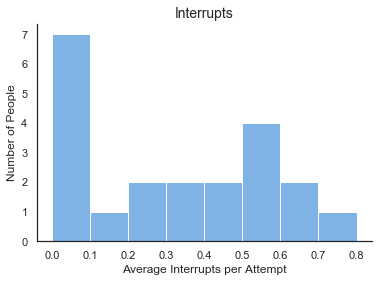

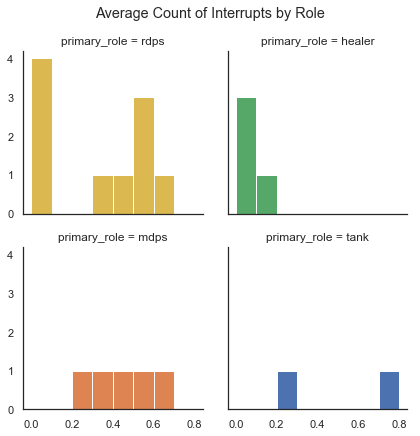

Mean is 0.311838 per attempt.
Median is 0.375000 per attempt.
Max attempts by player is 40.


In [132]:
la.collect_stats(data=jadefire_interrupts, master_list=master_list, player_list=player_list, 
                 boss_name='Jadefire Masters', boss_id=2266, spell_name='Interrupts', 
                 analysis_columns=['count'], min_attempts=15, least=False, bins=bins)

<a id='jf_dispells'></a>
### Dispells

Spell IDs:
- Priest: Purify (527), Mass Dispel (32375)
- Paladin: Cleanse (4987)
- Shaman: Purify Spirit (77130)
- Druid: Nature's Cure (88423)
- Monk: Detox (115450)

In [101]:
jadefire_dispells = pd.DataFrame([], columns=['log_id', 'spell_id', 'player', 'count'])

dispell_ids = [527, 32375, 4987, 77130, 88423, 115450]

for spell_id in dispell_ids:
    try:
        print('Spell Id:', spell_id)
        spell_df = wl.cast_count(api_key, master_list, spell_id, boss_id=2265)
        jadefire_dispells = pd.concat([jadefire_dispells, spell_df])
    except:
        continue

Spell Id: 527
Player added: Mythroes
Player added: Mythroes
Player added: Mythroes
Player added: Mythroes
Player added: Mythroes
Player added: Mythroes
Spell Id: 32375
Spell Id: 4987
Player added: Acturus
Player added: Acturus
Player added: Acturus
Player added: Acturus
Player added: Acturus
Player added: Acturus
Player added: Acturus
Player added: Acturus
Player added: Acturus
Spell Id: 77130
Player added: Illestrae
Player added: Illestrae
Player added: Illestrae
Player added: Illestrae
Player added: Illestrae
Player added: Illestrae
Spell Id: 88423
Player added: Jampers
Player added: Jampers
Player added: Jampers
Player added: Jampers
Player added: Jampers
Player added: Jampers
Player added: Jampers
Player added: Jampers
Spell Id: 115450
Player added: Caydd
Player added: Caydd
Player added: Caydd
Player added: Caydd
Player added: Caydd
Player added: Caydd


In [135]:
bins = np.arange(0.5, 1.5, 0.1)

         player  count  fight_count primary_role  av_count
12      Jampers   41.0           40       healer  1.025000
10    Illestrae   33.0           40       healer  0.825000
0       Acturus   29.0           40       healer  0.725000
16     Mythroes   24.0           37       healer  0.648649
17      Petroll    0.0           40         rdps  0.000000
26       Ultray    0.0           35         rdps  0.000000
25        Toyqt    0.0           31         mdps  0.000000
24         Tawn    0.0           37         rdps  0.000000
23       Tahvee    0.0           27         rdps  0.000000
21  Stradivarus    0.0           32         rdps  0.000000
19  Shadowbaine    0.0           20         rdps  0.000000
18  Psychodruid    0.0           29         rdps  0.000000
15     Metönymy    0.0           40         rdps  0.000000
2        Ayriea    0.0           37         rdps  0.000000
14    Kopyedeep    0.0           39         rdps  0.000000
11    Irvaeryss    0.0           34         mdps  0.0000

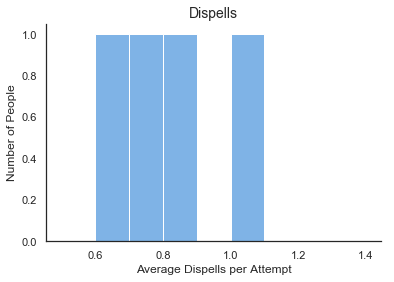

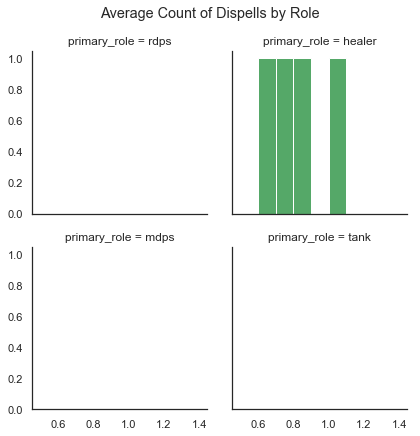

Mean is 0.153507 per attempt.
Median is 0.000000 per attempt.
Max attempts by player is 40.


In [136]:
la.collect_stats(data=jadefire_dispells, master_list=master_list, player_list=player_list, 
                 boss_name='Jadefire Masters', boss_id=2266, spell_name='Dispells', 
                 analysis_columns=['count'], min_attempts=15, least=False, bins=bins)

<a id='multi-sided'></a>
### Multi-Sided Strike

Spell ID: 284028

In [104]:
multi_sided = wl.damage_taken(api_key, master_list, 284028, boss_id=2266, hit_type='hitCount')

Player added: Valmet
Player added: Jampers
Player added: Illestrae
Player added: Ayriea
Player added: Atalya
Player added: Ayriea
Player added: Stradivarus
Player added: Earrl
Player added: Valmet
Player added: Petroll
Player added: Psychodruid
Player added: Jampers
Player added: Brianjr
Player added: Jampers
Player added: Petroll
Player added: Jampers
Player added: Toyqt
Player added: Valmet
Player added: Earrl
Player added: Metönymy
Player added: Brianjr
Player added: Shadowbaine
Player added: Stradivarus
Player added: Petroll
Player added: Illestrae
Player added: Ultray
Player added: Ayriea
Player added: Tawn
Player added: Shadowbaine
Player added: Jampers
Player added: Shadowbaine
Player added: Jampers
Player added: Earrl
Player added: Brianjr
Player added: Petroll


In [114]:
bins = np.arange(0, 0.5, 0.05)

         player  hits  damage_taken  fight_count primary_role  av_count
0       Acturus   0.0           0.0           40       healer  0.000000
23       Tahvee   0.0           0.0           27         rdps  0.000000
16     Mythroes   0.0           0.0           37       healer  0.000000
5     Divinance   0.0           0.0           40         tank  0.000000
14    Kopyedeep   0.0           0.0           39         rdps  0.000000
7         Elzam   0.0           0.0           32         mdps  0.000000
11    Irvaeryss   0.0           0.0           34         mdps  0.000000
15     Metönymy   1.0       89813.0           40         rdps  0.025000
24         Tawn   1.0       89897.0           37         rdps  0.027027
26       Ultray   1.0       91979.0           35         rdps  0.028571
25        Toyqt   1.0       96577.0           31         mdps  0.032258
18  Psychodruid   2.0      179448.0           29         rdps  0.068966
3       Brianjr   3.0      280235.0           34         mdps  0

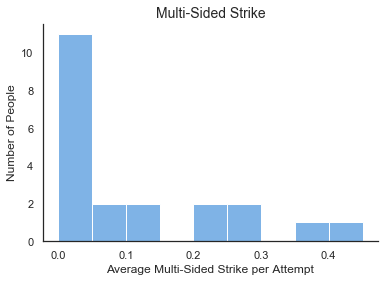

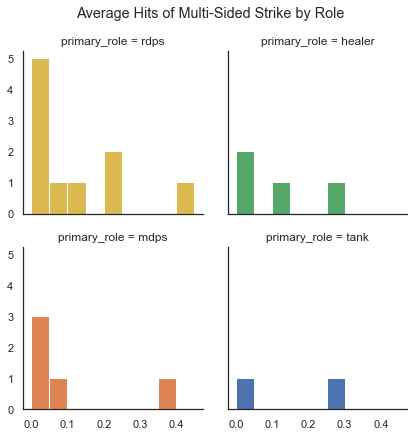

Mean is 0.106996 per attempt.
Median is 0.032258 per attempt.
Max attempts by player is 40.


In [127]:
la.collect_stats(data=multi_sided, master_list=master_list, player_list=player_list, 
                 boss_name='Jadefire Masters', boss_id=2266, spell_name='Multi-Sided Strike', 
                 analysis_columns=['hits', 'damage_taken'], min_attempts=15, bins=bins)

<a id='grong'></a>
## Grong

### Interrupts

In [139]:
grong_interrupts = pd.DataFrame([], columns=['log_id', 'spell_id', 'player', 'count'])

for spell_id in interrupt_ids:
    try:
        print('Spell Id:', spell_id)
        spell_df = wl.cast_count(api_key, master_list, spell_id, boss_id=2263)
        grong_interrupts = pd.concat([grong_interrupts, spell_df])
    except:
        continue

Spell Id: 2139
Player added: Petroll
Player added: Metönymy
Player added: Tawn
Player added: Metönymy
Player added: Petroll
Player added: Metönymy
Player added: Petroll
Player added: Metönymy
Player added: Petroll
Player added: Tawn
Player added: Petroll
Player added: Tawn
Player added: Metönymy
Player added: Tawn
Player added: Petroll
Player added: Tawn
Player added: Metönymy
Player added: Petroll
Player added: Metönymy
Player added: Tawn
Player added: Petroll
Player added: Tawn
Player added: Metönymy
Player added: Petroll
Spell Id: 78675
Player added: Psychodruid
Player added: Soome
Player added: Psychodruid
Player added: Psychodruid
Player added: Psychodruid
Player added: Soome
Player added: Soome
Player added: Psychodruid
Spell Id: 106839
Player added: Earrl
Player added: Earrl
Player added: Earrl
Spell Id: 6552
Player added: Velryssa
Player added: Elzam
Player added: Velryssa
Player added: Elzam
Player added: Elzam
Player added: Elzam
Player added: Velryssa
Player added: Elzam
Pla

Spell Id: 15487
Player added: Stradivarus
Player added: Stradivarus
Player added: Stradivarus


In [154]:
bins = np.arange(0, 5.5, 0.5)

         player  count  fight_count primary_role  av_count
27       Valmet  193.0           42         mdps  4.595238
7         Elzam  167.0           40         mdps  4.175000
17      Petroll  166.0           42         rdps  3.952381
3       Brianjr  123.0           41         mdps  3.000000
24         Tawn  101.0           39         rdps  2.589744
2        Ayriea   27.0           11         rdps  2.454545
13       Kohbee   99.0           41         rdps  2.414634
15     Metönymy   69.0           37         rdps  1.864865
23       Tahvee   60.0           33         rdps  1.818182
18  Psychodruid   17.0           12         rdps  1.416667
10    Illestrae   23.0           42       healer  0.547619
21  Stradivarus   17.0           35         rdps  0.485714
25        Toyqt    6.0           38         mdps  0.157895
0       Acturus    5.0           42       healer  0.119048
6         Earrl    3.0           42         tank  0.071429
12      Jampers    0.0           42       healer  0.0000

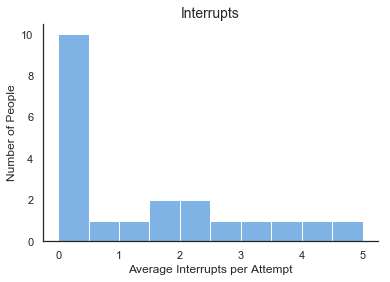

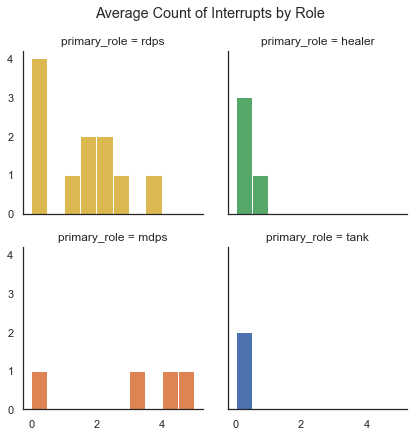

Mean is 1.412522 per attempt.
Median is 0.547619 per attempt.
Max attempts by player is 42.


In [156]:
la.collect_stats(data=grong_interrupts, master_list=master_list, player_list=player_list, 
                 boss_name='Grong', boss_id=2263, spell_name='Interrupts', 
                 analysis_columns=['count'], min_attempts=10, least=False, bins=bins)

## Opulence

### Volatile Charge

Spell IDs: 
- 283574
- 287648
- 283557

In [159]:
vc_ids = [283574, 287648, 283557]

volatile_charge = surging_darkness = pd.DataFrame([], columns=['log_id', 'spell_id','player', 
                                             'hits', 'damage_taken'])

for charge_id in vc_ids:
    id_df = wl.damage_taken(api_key, master_list, charge_id, boss_id=2271, hit_type='hitCount')
    volatile_charge = pd.concat([volatile_charge, id_df])

Player added: Jampers
Player added: Psychodruid
Player added: Petroll
Player added: Ultray
Player added: Velryssa
Player added: Jampers
Player added: Ultray
Player added: Ayriea
Player added: Kopyedeep
Player added: Psychodruid
Player added: Toyqt
Player added: Elzam
Player added: Tawn
Player added: Stradivarus
Player added: Metönymy
Player added: Earrl
Player added: Mythroes
Player added: Irvaeryss
Player added: Kohbee
Player added: Petroll
Player added: Brianjr
Player added: Valmet
Player added: Jampers
Player added: Stradivarus
Player added: Stradivarus
Player added: Mythroes
Player added: Toyqt
Player added: Kopyedeep
Player added: Psychodruid
Player added: Jampers
Player added: Brianjr
Player added: Divinance
Player added: Stradivarus
Player added: Acturus
Player added: Ultray
Player added: Shadowbaine
Player added: Petroll
Player added: Ayriea
Player added: Elzam
Player added: Illestrae
Player added: Mythroes
Player added: Kohbee
Player added: Metönymy
Player added: Earrl
Player 

Player added: Psychodruid
Player added: Brianjr
Player added: Caydd
Player added: Irvaeryss
Player added: Petroll
Player added: Toyqt
Player added: Acturus
Player added: Elzam
Player added: Earrl
Player added: Illestrae
Player added: Shadowbaine
Player added: Ultray
Player added: Shadowbaine
Player added: Tawn
Player added: Petroll
Player added: Toyqt
Player added: Divinance
Player added: Petroll
Player added: Elzam
Player added: Kohbee
Player added: Irvaeryss
Player added: Jampers
Player added: Brianjr
Player added: Toyqt
Player added: Earrl
Player added: Tawn
Player added: Psychodruid
Player added: Tahvee
Player added: Valmet
Player added: Metönymy
Player added: Ultray
Player added: Illestrae
Player added: Ayriea
Player added: Caydd
Player added: Jampers
Player added: Shadowbaine
Player added: Tawn
Player added: Psychodruid
Player added: Kohbee
Player added: Mythroes
Player added: Metönymy
Player added: Petroll
Player added: Kopyedeep
Player added: Soome
Player added: Toyqt
Player ad

In [162]:
bins = np.arange(0.05, 0.8, 0.1)

         player  hits  damage_taken  fight_count primary_role  av_count
0       Acturus   7.0      928742.0           90       healer  0.077778
5     Divinance  11.0     1124574.0           90         tank  0.122222
28     Velryssa   4.0     1328444.0           30         mdps  0.133333
10    Illestrae  19.0     3889534.0           90       healer  0.211111
13       Kohbee  22.0     5316205.0           87         rdps  0.252874
2        Ayriea  26.0     5055767.0           80         rdps  0.325000
25        Toyqt  29.0     7034668.0           87         mdps  0.333333
24         Tawn  29.0     6340687.0           86         rdps  0.337209
27       Valmet  32.0     5928077.0           90         mdps  0.355556
6         Earrl  34.0     3854306.0           90         tank  0.377778
21  Stradivarus  23.0     3856130.0           60         rdps  0.383333
7         Elzam  32.0     4731975.0           78         mdps  0.410256
18  Psychodruid  38.0     7325156.0           86         rdps  0

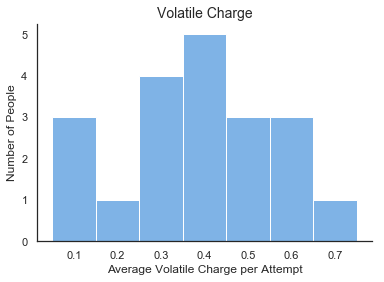

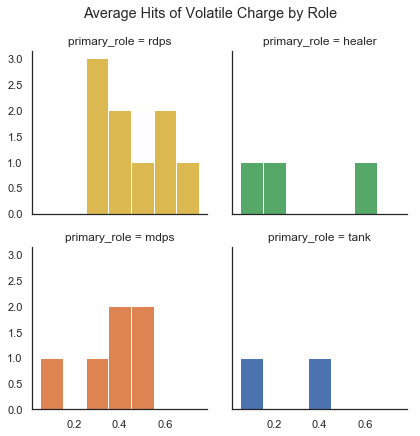

Mean is 0.419122 per attempt.
Median is 0.396795 per attempt.
Max attempts by player is 90.


In [163]:
la.collect_stats(data=volatile_charge, master_list=master_list, player_list=player_list, 
                 boss_name='Opulence', boss_id=2271, spell_name='Volatile Charge', 
                 analysis_columns=['hits', 'damage_taken'], min_attempts=30, bins=bins)

### Flames of Punishment

Spell IDs:
- 287513
- 283063

In [164]:
fp_ids = [287513, 283063]

flames_punish = pd.DataFrame([], columns=['log_id', 'spell_id','player', 
                                             'hits', 'damage_taken'])

for flame_id in fp_ids:
    id_df = wl.damage_taken(api_key, master_list, charge_id, boss_id=2271, hit_type='hitCount')
    flames_punish = pd.concat([volatile_charge, id_df])

Player added: Psychodruid
Player added: Tahvee
Player added: Stradivarus
Player added: Ultray
Player added: Kopyedeep
Player added: Brianjr
Player added: Ayriea
Player added: Illestrae
Player added: Brianjr
Player added: Earrl
Player added: Metönymy
Player added: Kopyedeep
Player added: Stradivarus
Player added: Ultray
Player added: Jampers
Player added: Petroll
Player added: Kohbee
Player added: Mythroes
Player added: Psychodruid
Player added: Elzam
Player added: Kopyedeep
Player added: Toyqt
Player added: Metönymy
Player added: Psychodruid
Player added: Mythroes
Player added: Shadowbaine
Player added: Irvaeryss
Player added: Metönymy
Player added: Valmet
Player added: Petroll
Player added: Ultray
Player added: Jampers
Player added: Toyqt
Player added: Earrl
Player added: Soome
Player added: Jampers
Player added: Shadowbaine
Player added: Psychodruid
Player added: Stradivarus
Player added: Metönymy
Player added: Toyqt
Player added: Shadowbaine
Player added: Ayriea
Player added: Irvaer

In [166]:
bins = np.arange(0.1, 1.2, 0.1)

         player  hits  damage_taken  fight_count primary_role  av_count
0       Acturus  10.0     1323307.0           90       healer  0.111111
28     Velryssa   4.0     1328444.0           30         mdps  0.133333
5     Divinance  15.0     1501617.0           90         tank  0.166667
10    Illestrae  24.0     4526324.0           90       healer  0.266667
13       Kohbee  31.0     6511540.0           87         rdps  0.356322
24         Tawn  37.0     7430359.0           86         rdps  0.430233
27       Valmet  39.0     6704952.0           90         mdps  0.433333
25        Toyqt  38.0     8199422.0           87         mdps  0.436782
6         Earrl  42.0     4673570.0           90         tank  0.466667
2        Ayriea  38.0     6654160.0           80         rdps  0.475000
21  Stradivarus  32.0     4721153.0           60         rdps  0.533333
7         Elzam  42.0     5920671.0           78         mdps  0.538462
11    Irvaeryss  46.0     5806316.0           83         mdps  0

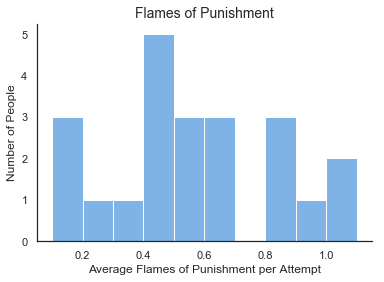

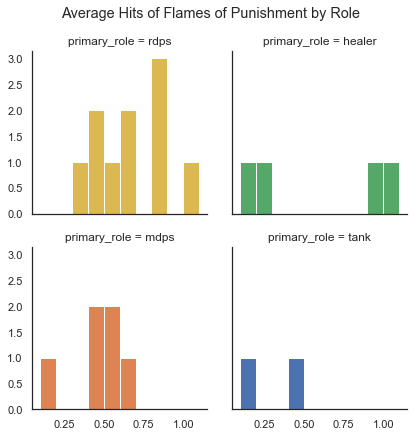

Mean is 0.570578 per attempt.
Median is 0.535897 per attempt.
Max attempts by player is 90.


In [167]:
la.collect_stats(data=flames_punish, master_list=master_list, player_list=player_list, 
                 boss_name='Opulence', boss_id=2271, spell_name='Flames of Punishment', 
                 analysis_columns=['hits', 'damage_taken'], min_attempts=30, bins=bins)

### Flame Jet

Spell ID: 285479

In [170]:
flame_jet = wl.damage_taken(api_key, master_list, 285479, boss_id=2271, hit_type='tickCount')

Player added: Stradivarus
Player added: Kohbee
Player added: Toyqt
Player added: Divinance
Player added: Velryssa
Player added: Shadowbaine
Player added: Earrl
Player added: Brianjr
Player added: Valmet
Player added: Irvaeryss
Player added: Ultray
Player added: Metönymy
Player added: Illestrae
Player added: Petroll
Player added: Tahvee
Player added: Psychodruid
Player added: Acturus
Player added: Mythroes
Player added: Jampers
Player added: Kopyedeep
Player added: Illestrae
Player added: Stradivarus
Player added: Ultray
Player added: Kohbee
Player added: Tawn
Player added: Irvaeryss
Player added: Earrl
Player added: Toyqt
Player added: Divinance
Player added: Mythroes
Player added: Petroll
Player added: Metönymy
Player added: Jampers
Player added: Elzam
Player added: Ayriea
Player added: Psychodruid
Player added: Brianjr
Player added: Kopyedeep
Player added: Acturus
Player added: Valmet
Player added: Ultray
Player added: Valmet
Player added: Ayriea
Player added: Kohbee
Player added: Ko

In [172]:
bins = np.arange(1, 9, 0.5)

         player   hits  damage_taken  fight_count primary_role  av_count
10    Illestrae  103.0     7431631.0           90       healer  1.144444
6         Earrl  111.0     7252110.0           90         tank  1.233333
12      Jampers  112.0     8540790.0           90       healer  1.244444
16     Mythroes   95.0     7304832.0           69       healer  1.376812
15     Metönymy  124.0     7734287.0           90         rdps  1.377778
2        Ayriea  115.0     8665227.0           80         rdps  1.437500
7         Elzam  126.0     9499253.0           78         mdps  1.615385
25        Toyqt  145.0    10895082.0           87         mdps  1.666667
0       Acturus  156.0    11707282.0           90       healer  1.733333
11    Irvaeryss  149.0     9301657.0           83         mdps  1.795181
17      Petroll  167.0    12470580.0           90         rdps  1.855556
21  Stradivarus  117.0     7902248.0           60         rdps  1.950000
24         Tawn  173.0    12869516.0           86  

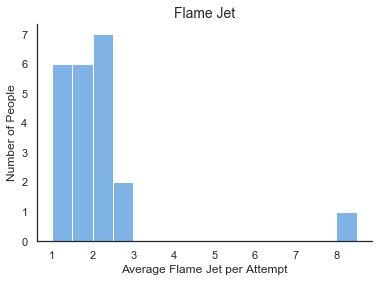

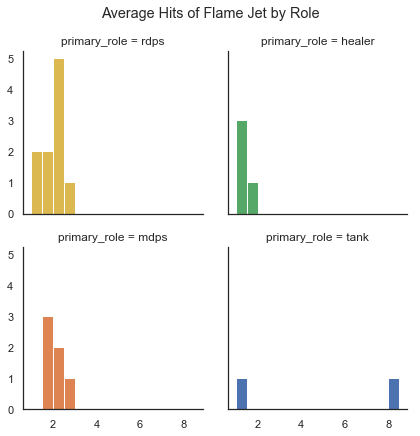

Mean is 2.151126 per attempt.
Median is 1.902778 per attempt.
Max attempts by player is 90.


In [173]:
la.collect_stats(data=flame_jet, master_list=master_list, player_list=player_list, 
                 boss_name='Opulence', boss_id=2271, spell_name='Flame Jet', 
                 analysis_columns=['hits', 'damage_taken'], min_attempts=30, bins=bins)

## Conclave of the Chosen

### Dispels

Only for curses. Spell IDs:
- Shaman: Purify Spirit (77130)
- Druid: Nature's Cure (88423)
- Mage: Remove Curse (475)

In [174]:
conclave_dispells = pd.DataFrame([], columns=['log_id', 'spell_id', 'player', 'count'])

dispel_ids = [77130, 88423, 475]

for spell_id in dispel_ids:
    try:
        print('Spell Id:', spell_id)
        spell_df = wl.cast_count(api_key, master_list, spell_id, boss_id=2265)
        conclave_dispells = pd.concat([conclave_dispells, spell_df])
    except:
        continue

Spell Id: 77130
Player added: Illestrae
Player added: Illestrae
Player added: Illestrae
Player added: Illestrae
Player added: Illestrae
Player added: Illestrae
Spell Id: 88423
Player added: Jampers
Player added: Jampers
Player added: Jampers
Player added: Jampers
Player added: Jampers
Player added: Jampers
Player added: Jampers
Player added: Jampers
Spell Id: 475


         player  count  fight_count primary_role  av_count
12      Jampers   41.0           51       healer  0.803922
10    Illestrae   33.0           51       healer  0.647059
0       Acturus    0.0           51       healer  0.000000
16     Mythroes    0.0           36       healer  0.000000
27       Valmet    0.0           43         mdps  0.000000
26       Ultray    0.0           48         rdps  0.000000
25        Toyqt    0.0           41         mdps  0.000000
24         Tawn    0.0           47         rdps  0.000000
23       Tahvee    0.0           19         rdps  0.000000
21  Stradivarus    0.0           33         rdps  0.000000
20        Soome    0.0            2         rdps  0.000000
19  Shadowbaine    0.0           51         rdps  0.000000
18  Psychodruid    0.0           26         rdps  0.000000
17      Petroll    0.0           51         rdps  0.000000
15     Metönymy    0.0           51         rdps  0.000000
1        Atalya    0.0            3         mdps  0.0000

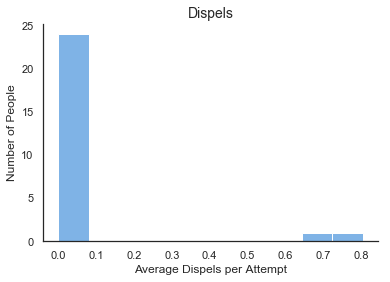

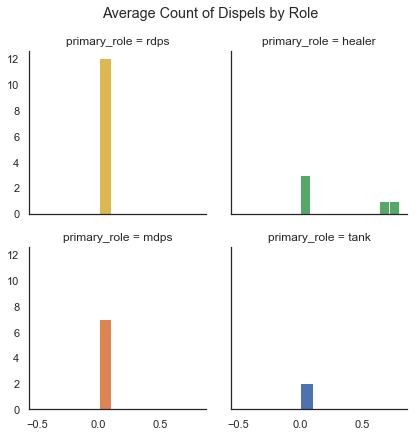

Mean is 0.055807 per attempt.
Median is 0.000000 per attempt.
Max attempts by player is 51.


In [177]:
la.collect_stats(data=conclave_dispells, master_list=master_list, player_list=player_list, 
                 boss_name='Conclave', boss_id=2268, spell_name='Dispels', 
                 analysis_columns=['count'], least=False, min_attempts=1)

### Add Damage Done

In [178]:
adds = wl.damage_done(api_key, master_list, boss_id=2268)

Player added: Tahvee
Player added: Irvaeryss
Player added: Shadowbaine
Player added: Psychodruid
Player added: Ultray
Player added: Jampers
Player added: Ayriea
Player added: Metönymy
Player added: Velryssa
Player added: Kohbee
Player added: Mythroes
Player added: Toyqt
Player added: Valmet
Player added: Kopyedeep
Player added: Caydd
Player added: Petroll
Player added: Acturus
Player added: Earrl
Player added: Illestrae
Player added: Stradivarus
Player added: Divinance
Player added: Metönymy
Player added: Caydd
Player added: Divinance
Player added: Psychodruid
Player added: Tawn
Player added: Elzam
Player added: Stradivarus
Player added: Ayriea
Player added: Kohbee
Player added: Acturus
Player added: Brianjr
Player added: Kopyedeep
Player added: Irvaeryss
Player added: Earrl
Player added: Petroll
Player added: Jampers
Player added: Ultray
Player added: Shadowbaine
Player added: Mythroes
Player added: Illestrae
Player added: Earrl
Player added: Toyqt
Player added: Irvaeryss
Player added

In [181]:
bins = np.arange(1.5e04, 1.5e06, 1e05)

         player  damage_done  fight_count primary_role      av_count
18  Psychodruid   32224403.0           26         rdps  1.239400e+06
21  Stradivarus   38885641.0           33         rdps  1.178353e+06
19  Shadowbaine   54555889.0           51         rdps  1.069723e+06
2        Ayriea   47665937.0           50         rdps  9.533187e+05
27       Valmet   37747844.0           43         mdps  8.778568e+05
11    Irvaeryss   33309218.0           51         mdps  6.531219e+05
15     Metönymy   31519506.0           51         rdps  6.180295e+05
7         Elzam   23640746.0           42         mdps  5.628749e+05
14    Kopyedeep   21415676.0           45         rdps  4.759039e+05
24         Tawn   21603928.0           47         rdps  4.596580e+05
26       Ultray   21071491.0           48         rdps  4.389894e+05
17      Petroll   20876801.0           51         rdps  4.093490e+05
3       Brianjr   17720081.0           48         mdps  3.691684e+05
13       Kohbee   11858753.0      

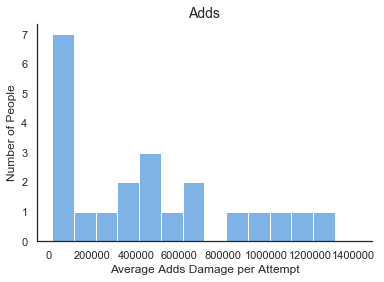

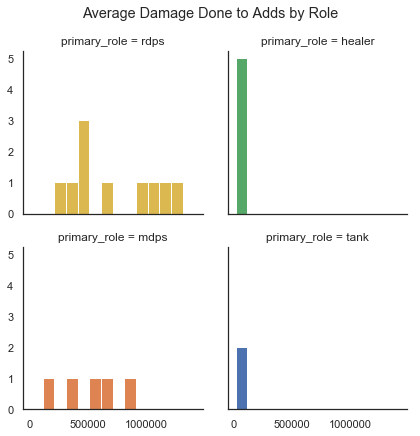

Mean is 462089.202516 per attempt.
Median is 424169.217525 per attempt.
Max attempts by player is 51.


In [182]:
la.collect_stats(data=adds, master_list=master_list, player_list=player_list, 
                 boss_name="Conclave", boss_id=2268, spell_name='Adds', 
                 analysis_columns=['damage_done'], min_attempts=20, least=False, bins=bins)

### Jagged Claws

Damage from adds. Spell ID: 286673

In [183]:
jagged_claws = wl.damage_taken(api_key, master_list, 286673, boss_id=2268, hit_type='hitCount')

Player added: Acturus
Player added: Jampers
Player added: Mythroes
Player added: Velryssa
Player added: Shadowbaine
Player added: Ultray
Player added: Kopyedeep
Player added: Petroll
Player added: Kohbee
Player added: Earrl
Player added: Stradivarus
Player added: Caydd
Player added: Metönymy
Player added: Valmet
Player added: Irvaeryss
Player added: Divinance
Player added: Illestrae
Player added: Tahvee
Player added: Psychodruid
Player added: Ayriea
Player added: Petroll
Player added: Stradivarus
Player added: Brianjr
Player added: Mythroes
Player added: Kopyedeep
Player added: Irvaeryss
Player added: Illestrae
Player added: Ayriea
Player added: Tawn
Player added: Psychodruid
Player added: Ultray
Player added: Shadowbaine
Player added: Metönymy
Player added: Kohbee
Player added: Elzam
Player added: Jampers
Player added: Caydd
Player added: Earrl
Player added: Divinance
Player added: Acturus
Player added: Mythroes
Player added: Irvaeryss
Player added: Kohbee
Player added: Ultray
Player 

In [190]:
bins = np.arange(0.5, 4, 0.5)

         player   hits  damage_taken  fight_count primary_role  av_count
27       Valmet   26.0     2862146.0           43         mdps  0.604651
2        Ayriea   34.0     3777364.0           50         rdps  0.680000
21  Stradivarus   23.0     2150790.0           33         rdps  0.696970
24         Tawn   34.0     4310623.0           47         rdps  0.723404
15     Metönymy   40.0     5062303.0           51         rdps  0.784314
13       Kohbee   33.0     3606118.0           40         rdps  0.825000
17      Petroll   44.0     5740435.0           51         rdps  0.862745
18  Psychodruid   23.0     2324315.0           26         rdps  0.884615
19  Shadowbaine   55.0     6939839.0           51         rdps  1.078431
16     Mythroes   40.0     4736263.0           36       healer  1.111111
3       Brianjr   56.0     6858512.0           48         mdps  1.166667
26       Ultray   60.0     7706038.0           48         rdps  1.250000
25        Toyqt   55.0     4747329.0           41  

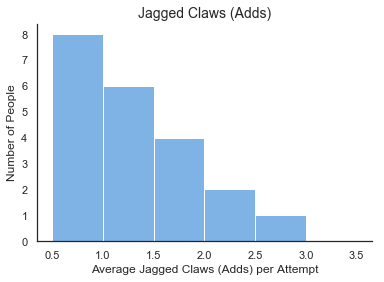

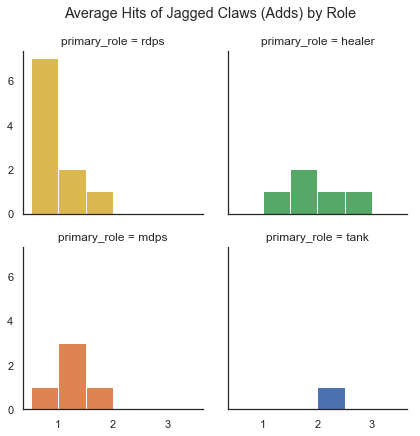

Mean is 1.382702 per attempt.
Median is 1.208333 per attempt.
Max attempts by player is 51.


In [191]:
la.collect_stats(data=jagged_claws, master_list=master_list, player_list=player_list, 
                 boss_name='Conclave', boss_id=2268, spell_name='Jagged Claws (Adds)', 
                 analysis_columns=['hits', 'damage_taken'], min_attempts=20, bins=bins)